In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import lmfit as lm

In [2]:
egfp = pd.read_excel('data-siRNA/2017_06_02_seq6_Huh7_controll_#molecules.xlsx',sheet="#GFP_corrected")

In [11]:
egfp_d = egfp.dropna().values.T

In [15]:
time = egfp_d[0].astype(np.double)

In [14]:
egfp_data = egfp_d[1:].astype(np.double)

Text(0,0.5,'# of RFP molecules')

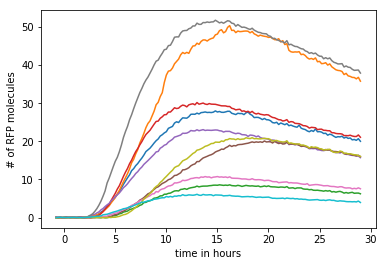

In [19]:
for data in egfp_data[:10]:
    plt.plot(time,data)
plt.xlabel('time in hours')
plt.ylabel('# of RFP molecules')

In [25]:
def egfp_expression(t,ktm,delta,beta,t0):
    result = ktm/(delta-beta)*(1-np.exp(-(delta-beta)*(t-t0)))*np.exp(-beta*(t-t0))
    result[t<t0] = 0
    return result

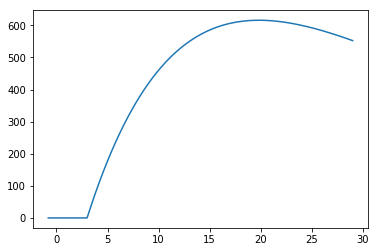

In [26]:
plt.plot(time,egfp_expression(time,100,0.05,0.07,3))

In [27]:
egfp_model = lm.Model(egfp_expression)

In [28]:
data = egfp_data[0]
sigma = np.sqrt(np.abs(egfp_data[0]))
sigma[sigma<=0] = 1.0

In [30]:
pars = egfp_model.make_params()

pars['ktm'].set(value=3,vary=True,min=0)
pars['delta'].set(value=0.05,vary=True,min=0)
pars['beta'].set(value=0.07,vary=True,min=0)
pars['t0'].set(value=6,vary=True,min=0)

result = egfp_model.fit(data,pars,t=time)

print(result.fit_report())


[[Model]]
    Model(egfp_expression)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 54
    # data points      = 150
    # variables        = 4
    chi-square         = 61.3146350
    reduced chi-square = 0.41996325
    Akaike info crit   = -126.192510
    Bayesian info crit = -114.149969
[[Variables]]
    ktm:    6.40012298 +/- 0.12889730 (2.01%) (init = 3)
    delta:  0.06663499 +/- 0.01113868 (16.72%) (init = 0.05)
    beta:   0.10660971 +/- 0.01672239 (15.69%) (init = 0.07)
    t0:     4.10478880 +/- 0.04603091 (1.12%) (init = 6)
[[Correlations]] (unreported correlations are < 0.100)
    C(delta, beta) = -0.996
    C(ktm, beta)   =  0.920
    C(ktm, delta)  = -0.885
    C(ktm, t0)     =  0.763
    C(beta, t0)    =  0.616
    C(delta, t0)   = -0.571



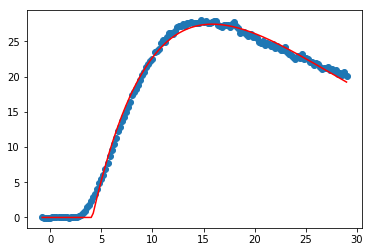

In [31]:
plt.plot(time,data,"o")
plt.plot(time,result.best_fit,'r-')